# Convolution

## Intuition

In [1]:
%matplotlib inline
import IPython
from IPython.display import Image
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.io import wavfile # get the api
from pylab import figure, show
import numpy as np

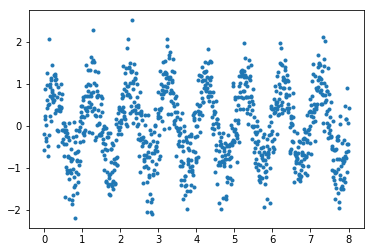

In [2]:
npts = 1024
end = 8
dt = end/float(npts)
nyf = 0.5/dt
sigma = 0.5 
x = np.linspace(0,end,npts)
n = np.random.normal(scale = sigma, size=(npts))
s = np.sin(2*np.pi*x)
y = s + n
plt.plot(x,y,ls='none',marker='.')

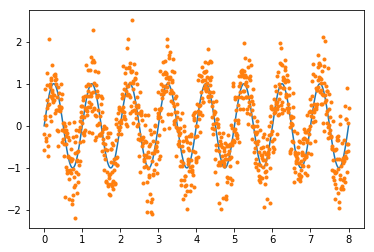

In [3]:
plt.plot(x,s)
plt.plot(x,y,ls='none',marker='.')

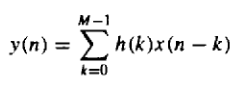

In [4]:
i = Image(filename='images/conv.png')
i

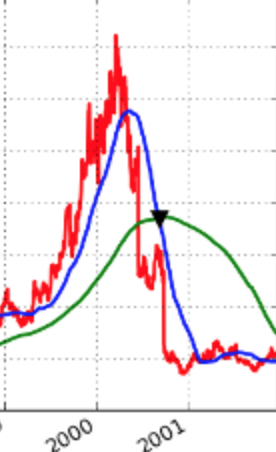

In [5]:
smoothIm = Image(filename='images/smooth.png')
smoothIm

In [6]:
fs, data = wavfile.read('astrud.wav')
IPython.display.Audio("astrud.wav")


/Users/Nestor/.local/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


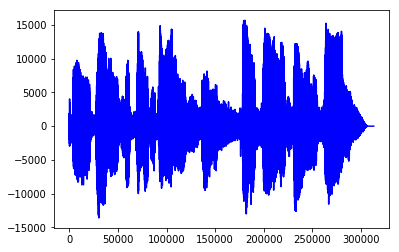

In [7]:
plt.plot(data,'b') 
plt.show()

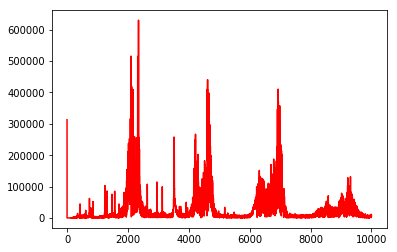

In [8]:
a = data # this is a two channel soundtrack, I get the first track
b=[(ele/2**8.)*2-1 for ele in a] # calculate fourier transform (complex numbers list)
c = fft(b) # calculate fourier transform (complex numbers list)
d = len(c)/2  # you only need half of the fft list (real signal symmetry)
plt.plot(abs(c[0:10000]),'r') 
plt.show()

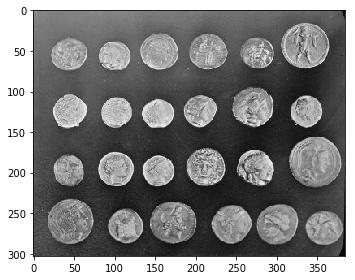

In [9]:
from skimage import data, io, filters

image = data.coins()
io.imshow(image)
io.show()


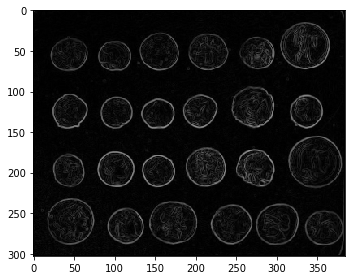

In [10]:
# ... or any other NumPy array!
edges = filters.sobel(image)
io.imshow(edges)
io.show()

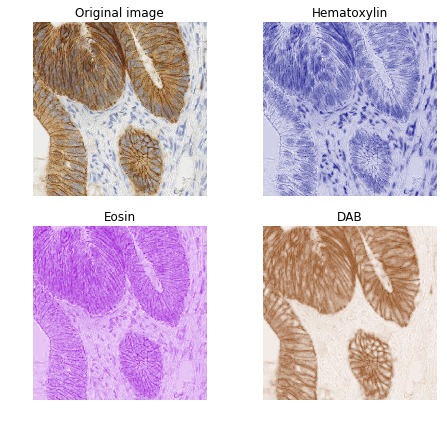

In [11]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2hed
from matplotlib.colors import LinearSegmentedColormap

# Create an artificial color close to the orginal one
cmap_hema = LinearSegmentedColormap.from_list('mycmap', ['white', 'navy'])
cmap_dab = LinearSegmentedColormap.from_list('mycmap', ['white',
                                             'saddlebrown'])
cmap_eosin = LinearSegmentedColormap.from_list('mycmap', ['darkviolet',
                                               'white'])

ihc_rgb = data.immunohistochemistry()
ihc_hed = rgb2hed(ihc_rgb)

fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()

ax[0].imshow(ihc_rgb)
ax[0].set_title("Original image")

ax[1].imshow(ihc_hed[:, :, 0], cmap=cmap_hema)
ax[1].set_title("Hematoxylin")

ax[2].imshow(ihc_hed[:, :, 1], cmap=cmap_eosin)
ax[2].set_title("Eosin")

ax[3].imshow(ihc_hed[:, :, 2], cmap=cmap_dab)
ax[3].set_title("DAB")

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()
plt.show()

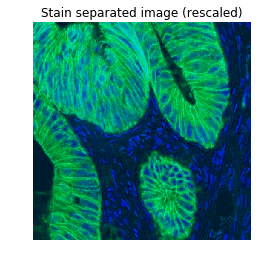

In [12]:
import numpy as np

from skimage.exposure import rescale_intensity

# Rescale hematoxylin and DAB signals and give them a fluorescence look
h = rescale_intensity(ihc_hed[:, :, 0], out_range=(0, 1))
d = rescale_intensity(ihc_hed[:, :, 2], out_range=(0, 1))
zdh = np.dstack((np.zeros_like(h), d, h))

fig = plt.figure()
axis = plt.subplot(1, 1, 1, sharex=ax[0], sharey=ax[0], adjustable='box-forced')
axis.imshow(zdh)
axis.set_title("Stain separated image (rescaled)")
axis.axis('off')
plt.show()